<div class="alert alert-block alert-danger">
    <b> Unraveling the cytoskeletal architecture of cancer cells: a novel computational approach to predict cell fate - CODE</b> 
    
 **4 - CELL SEGMENTATION**
    
**Author**: Diogo Fróis Vieira
</div>

<div class="alert alert-block alert-info">
    
 **IMPORTS**
    
</div>

In [1]:
import sys
import os
sys.path.append(os.path.abspath('..'))
from packageCYSK.importing import *
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import ipywidgets as widgets
from ipywidgets import interact, interactive, fixed, interact_manual
from IPython.display import display
import pickle
import cv2
from packageCYSK.manual_segmentation import *

print('📚 All libraries successfully imported **(for ROI selection)** 📚')

📚 All libraries successfully imported **(for ROI selection)** 📚


<div class="alert alert-block alert-info">
    
 **DIRECTORIES**
    
</div>

In [2]:
# Define dataset folder.
folder      = os.path.dirname(os.getcwd()) + "\\Datasets\\Set 1-a-tubulin_Sofia"

# Import images from CYTO, NUCL and RGB folders.
options     = ["CYTO","NUCL","RGB"]

# Dictionary with keys "CYTO", "NUCL", "RGB".
data = init_import(folder,options)

>>> [CYTO] added.
>>> [NUCL] added.
>>> [RGB] added.


<div class="alert alert-block alert-info">
    
 **INSTRUCTIONS**
    
</div>

**1.** Select an image.

**2.** Draw a polygonal ROI around the cell of interest with left clicks. Once done, right click, a new window will open and a new ROI can be drawn. A new entry of ```ROIs``` was added with the mask just drawn.

**3.** Once done, close the window and observe the dataframe with the ROIs. You can delete the last row of ```ROIs``` if you drew an invalid polygon.

**4.** Repeat this process if you have a dataset of images. 

<div class="alert alert-block alert-info">
    
 **SELECT IMAGE**
    
</div>

In [3]:
def dropdown_image_eventhandler(change):
    global idx
    idx = dropdown_image.value
    lab = data['CYTO']['Label'][dropdown_image.value]
    print('Image ' + str(idx) + ' (' + str(lab) +') selected.')

dropdown_image = widgets.Dropdown(description =  'Select Image:' , options = ['...'] + list(data['CYTO'].index))
dropdown_image.observe(dropdown_image_eventhandler, names='value')
display(dropdown_image)

Dropdown(description='Select Image:', options=('...', '11', '16', '18', '20', '30', '34', '36', '38', '40', '4…

Image 9 (WT) selected.
Image 11 (WT) selected.
Image 9 (WT) selected.


<div class="alert alert-block alert-info">
    
 **ROI SELECTION**
    
</div>

In [6]:
%matplotlib qt
ROIs = roi_selector(data,idx)

🔎
Window closed
list index out of range


In [7]:
ROIs

,Name,Index,Label,Image Size,ROImask
0,MTs_9_WT_None.tif,9,WT,"(1040, 1388)","([497, 497, 497, 497, 497, 497, 498, 498, 498,..."
1,MTs_9_WT_None.tif,9,WT,"(1040, 1388)","([376, 376, 376, 377, 377, 377, 377, 377, 377,..."
2,MTs_11_WT_None.tif,11,WT,"(1040, 1388)","([200, 200, 200, 201, 201, 201, 201, 201, 202,..."


**DELETE LAST ROW**

In [25]:
ROIs.drop(ROIs.tail(1).index,inplace=True)

---

<div class="alert alert-block alert-info">
    
 **PLOT ROIs**
    
</div>

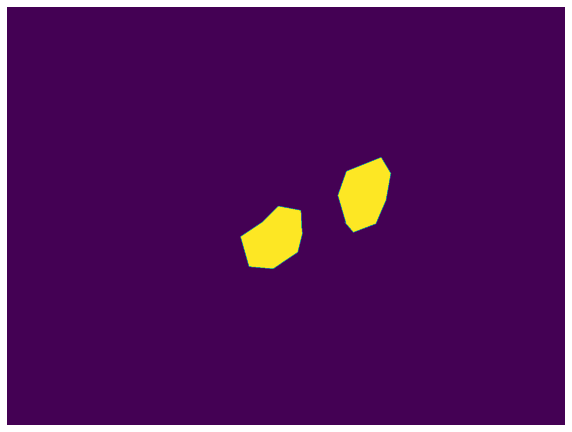

In [9]:
%matplotlib inline
plot_selected_ROIs(ROIs,idx)

<div class="alert alert-block alert-info">
    
 **SAVE ROIs**
    
</div>

In [7]:
ROIs.to_pickle(folder + '//ROIs//ROIs_TEST.pkl')   

---